# Import bibliotek

In [1]:
import pandas as pd

# Import danych

In [2]:
data = pd.DataFrame({
    'gender': ['male', 'female', 'male', 'female', 'female'],
    'age': [20, 35, 50, 40, 25],
    'height': [170, 165, 180, 160, 175],
    'weight': [90, 65, 82, 70, 72],
    'seating_work': [1, 0, 1, 1, 0],
    'hypertension': [1, 0, 1, 0, 1],
})

data

,gender,age,height,weight,seating_work,hypertension
0,male,20,170,90,1,1
1,female,35,165,65,0,0
2,male,50,180,82,1,1
3,female,40,160,70,1,0
4,female,25,175,72,0,1


# Uproszczony algorytm drzewa decyzyjnego

## Klasa Node

In [3]:
# Klasa Node reprezentuje węzeł w drzewie decyzyjnym
class Node:

    def __init__(
            self,
            feature=None,         # nazwa cechy, po której następuje podział (np. 'wiek', 'wzrost')
            split_value=None,     # wartość podziału (np. wiek > 30)
            is_discrete=False,    # czy cecha jest dyskretna (True/False) czy ciągła (np. wiek)
            left=None,            # lewe poddrzewo (spełniony warunek podziału)
            right=None,           # prawe poddrzewo (niespełniony warunek podziału)
            value=None,           # wartość przewidywana w liściu
            parent = None):       # rodzic węzła (None dla korzenia)
            # left, right i value jednocześnie nie mogą być różne od None
        self.feature = feature
        self.split_value = split_value
        self.is_discrete = is_discrete
        self.left = left
        self.right = right
        self.value = value
        self.parent = parent

    @property # wytłumaczyłam sobie niżej w tekście, czym jest property
    def is_leaf(self):
        # Sprawdza czy węzeł jest liściem (nie ma dzieci)
        return self.left is None and self.right is None
    
    @property
    def is_root(self):
        # Sprawdza czy węzeł jest korzeniem (nie ma rodzica)
        return self.parent is None
    
    def predict(self, x: pd.Series): # ok, x: to taki hint dla pythona, ale i tak nic sobie z nim nie zrobi, czyli to hint dla mnie, dziękuję
        # Metoda dokonująca predykcji dla pojedynczego przykładu x
        # x to wiersz danych jako pandas Series
        
        # Jeśli jesteśmy w liściu, zwracamy jego wartość
        if self.is_leaf:
            return self.value
            
        # Dla cech dyskretnych sprawdzamy równość
        if self.is_discrete:
            if self.split_value == x[self.feature]:
                return self.right.predict(x)
            else:
                return self.left.predict(x)

        # Dla cech ciągłych sprawdzamy czy wartość jest mniejsza/równa
        else:
            if x[self.feature] >= self.split_value:
                return self.right.predict(x)
            else:
                return self.left.predict(x)
            

In [5]:
# Przykład utworzenia prostego drzewa decyzyjnego dla cechy 'seating_work'
node_seating_work = Node( # tutaj tworzymy węzeł
    feature='seating_work', 
    split_value=True, 
    is_discrete=True, 
    left=Node(value=0, parent=node_seating_work), # czyli tutaj tworzymy dziecko dla tego węzła node_seating_work
    right=Node(value=1, parent=node_seating_work)) # a tu drugie dziecko, a te dzieci nie mają już dzieci, czyli są liśćmi, czyli 
    # tworzymy trzy węzły na raz, bo `left=Node(value=0)` tworzy w środku nowy węzeł, który ma domyślnie same None oprócz value=0
    # analogicznie drugi liść

#node_seating_work.predict(data.iloc[0])

# a teraz sobie sprawdzimy, czy to lewe dziecko jest liściem
#node_seating_work.left.is_leaf # co się tutaj dzieje? atrybut left tworzy nowy obiekt Node (podczas tworzenia node_seating_work), więc 
# wywołujemy property z tego drugiego obiektu

NameError: name 'node_seating_work' is not defined

In [ ]:
# sprawdzamy, czy zadziała, bo w komórce wyżej podkreśla, że przekazujemy obiekt, który nie istnieje
node_seating_work.left.parent

NameError: name 'node_seating_work' is not defined

**property** w pythonie to taka metoda, która udaje atrybut, możemy ją wywołać jak atrybut, czyli bez nawiasów, ale różni się od atrybutu tym, że nie możemy zmienić jej wartości

```python
node_seating_work.is_leaf = True
```
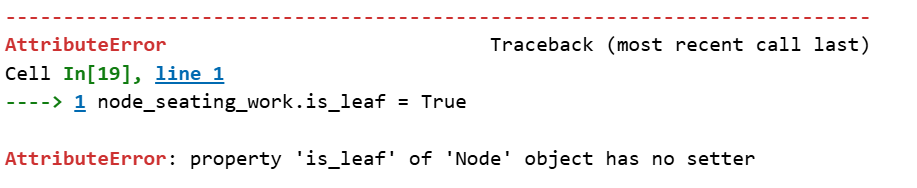

In [ ]:
node_seating_work.predict(data.iloc[1])

0

In [ ]:
node_weight = Node(
    feature="weight",
    split_value=80,
    is_discrete=False,
    left=Node(value=0),
    right=Node(value=1)
)

node_weight.predict(data.loc[1])

0

Spróbuję policzyć nieczystość Giniego dla podziału drzewa przy użyciu "gender" - predykcja "hypertension"

In [ ]:
data

,gender,age,height,weight,seating_work,hypertension
0,male,20,170,90,1,1
1,female,35,165,65,0,0
2,male,50,180,82,1,1
3,female,40,160,70,1,0
4,female,25,175,72,0,1


Poniżej moje luźne próby zrozumienia jak się liczy gini impurity

In [ ]:
# NA TO JEST FUNKCJA pd.crosstab() :)))))))))))))))))

# male_hyper = 0
# male_no_hyper = 0
# female_hyper = 0
# female_no_hyper = 0

# for index in range(len(data)):
#     if data.iloc[index].loc["gender"] == "male":
#         if data.iloc[index].loc["hypertension"] == 1:
#             male_hyper += 1
#         else:
#             male_no_hyper += 1
#     else:
#         if data.iloc[index].loc["hypertension"] == 1:
#             female_hyper += 1
#         else:
#             female_no_hyper += 1
# hyper_dict = {
#     "male": male_hyper,
#     "female": female_hyper
# }
# no_hyper_dict = {
#     "male": male_no_hyper,
#     "female": female_no_hyper
# }

# gini_dict = {}
# for gender in data["gender"].unique():
#     gini_dict[f"gini_{gender}"] = 1 - (hyper_dict[gender]/(hyper_dict[gender] + no_hyper_dict[gender]))**2 \
#         - (no_hyper_dict[gender]/(hyper_dict[gender] + no_hyper_dict[gender]))**2
# gini_dict

# male = male_hyper + male_no_hyper
# female = female_hyper + female_no_hyper
# gini_gender = gini_dict["gini_male"] * (male/len(data)) + gini_dict["gini_female"] * (female/len(data))
# gini_gender

Teraz spróbujemy napisać funkcję, która dostanie kolumnę z df, sprawdzi, czy jest dychotomiczna, czy ma więcej wartości (u nas domyślnie będzie wtedy numeryczna) i policzy nieczystość Giniego dla tej kolumny. Gdy kolumna ma więcej wartości, to pętlą liczymy k-1 nieczystości Giniego i wybieramy najniższą wartość.

In [ ]:
data.dtypes

gender          object
age              int64
height           int64
weight           int64
seating_work     int64
hypertension     int64
dtype: object

Funckja "gotowa":

In [ ]:
def gini_impurity_for_feature(df: pd.DataFrame, feature: str, target: str="hypertension"): # można jeszcze sprawdzić, czy target jest bool
    # jeśli target ma więcej niż dwie unikalne wartości, to nie policzymy
    #if len(df[target].unique()) > 2:

    if len(df[feature].unique()) == 1:
        return 9999

    if len(df[feature].unique()) == 2: # w sumie ten pierwszy if zawiera się w tym warunku elif
        # dokładnie ten sam kod co w ifie wyżej
        # tworzymy tablicę kontyngencji
        contingency = pd.crosstab(df[feature], df[target])
        # zliczamy liczebność - liczba wierszy w wejściowej df
        total = contingency.sum().sum()
        # obliczamy gini dla każdego wiersza czyli dla każdej kategorii
        gini_per_category = 1 - (contingency.div(contingency.sum(axis=1), axis=0) ** 2).sum(axis=1)
        # obliczamy gini dla całej kolumny jako  średnia ważona
        gini_total = (gini_per_category * (contingency.sum(axis=1) / total)).sum()
        return gini_total # contingency, gini_total


Próby działania gotowej funkcji:

In [ ]:
gini_gender = gini_impurity_for_feature(data, "gender")
#print(cross_tab_gender)
print(gini_gender)

0.26666666666666666


Rozpisana z komentarzami pierwsza część funkcji liczenia gini impurity dla kolumny, czyli dla zmiennej "gender":

In [ ]:
contingency = pd.crosstab(data["gender"], data["hypertension"])
# obliczymy w każdej płci osobno proporcje osób bez i z hypertension
contingency.div(contingency.sum(axis=1), axis=0)

# teraz te proporcje podnosimy do kwadratu
contingency.div(contingency.sum(axis=1), axis=0) ** 2

# i teraz dla każdego wiersza (kategorii) sumujemy po kolumnach targetu (0, 1)
(contingency.div(contingency.sum(axis=1), axis=0) ** 2).sum(axis=1)

# i teraz odejmujemy całość od 1 i mamy gini impurity dla każdej kategorii ("gender")
gini_per_category = 1 - (contingency.div(contingency.sum(axis=1), axis=0) ** 2).sum(axis=1)
gini_per_category # wow

# teraz tylko zostaje gini_total jako średnia ważona gini_per_category
# ile jest osób z danej płci - kategorii
contingency.sum(axis=1)
# teraz to dzielimy przez total i mamy wagi 
total = contingency.sum().sum()
contingency.sum(axis=1) / total
# teraz gini_per_category mnożymy odpowiednio przez wagi
gini_total = gini_per_category * (contingency.sum(axis=1) / total)

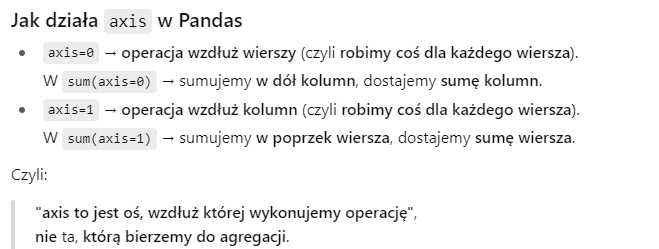

### Spróbuję zrobić funkcję, która oblicza w pętli gini impurity, wybiera feature, dla którego gini jest najmniejszy i tworzy węzeł decyzyjny z tą zmienną (cały czas domyślnie "hypertension" targetem).

In [ ]:
def lowest_gini_moje_xd(df: pd.DataFrame, target: str = "hypertension"):
    features = [col for col in df.columns if col != target]
    gini_features = {}
    for feature in features:
        gini_features[feature] = gini_impurity_for_feature(df, feature, target)
    lowest_gini = min(gini_features, key=gini_features.get)
    best_feature = gini_features[lowest_gini]
    return best_feature, lowest_gini

In [ ]:
def lowest_gini(df: pd.DataFrame, target: str = "hypertension"):
    # lista kolumn z df bez kolumny bez targetu
    features = [feature for feature in df.columns if feature != target]
    # szukamy feature, dla którego gini impurity jest najmniejszy przy podziale wg targutu
    best_feature = min(features, key=lambda feature: gini_impurity_for_feature(df, feature, target)) # XDDDD wooooow
    return best_feature

In [ ]:
def build_tree(df: pd.DataFrame, target: str="hypertension"):
    # na razie zmienne tylko dla których len(df[feature].unique())==2
    # obsługujemy przypadek, że df od razu jest liściem:
    if len(df[target].unique()) == 1:
        print("first if") # czyli mamy df z samymi 0 lub 1 w kolumnie "hypertension"
        return Node(value=df[target].iloc[0]) # bierzemy pierwszą wartość z Series, bo wszystkie takie same
    # musimy ustalić, czy zmienna jest kategorialna (np. płeć) czy numeryczna/boolean
    best_feature = lowest_gini(df, target=target)
    if True: # głupie ale mi się nie chce usuwać wcięć
        split_value = sorted(df[best_feature].unique())[0] # jeden celowo żeby pasowało do moich rozkmin z zeszytu, bo "male" drugie na liście
        print("Split value:", split_value)
        is_discrete = True
        # dzielimy na dwie df w zależności od spełnienia warunku
        left_df = df[df[best_feature]==split_value]
        right_df = df[df[best_feature]!=split_value]
        # potwierdzimy sobie, co wyprintuje
        print(left_df)
        # Jeśli któraś gałąź pusta → liść z najczęstszą klasą
        if len(left_df) == 0 or len(right_df) == 0:
            majority_class = df[target].mode()[0]
            print("majority")
            return Node(value=majority_class)
        left_child = build_tree(left_df, target)
        right_child = build_tree(right_df, target)
        return Node(feature=best_feature, split_value=split_value, is_discrete=is_discrete, left=left_child, right=right_child)

In [ ]:
data2 = data[["gender", "seating_work", "hypertension"]]

In [ ]:
dict = {"asia": 10, "mikołaj": 20}
dict.get("ko")

In [ ]:
tree = build_tree(data2)

Split value: female
   gender  seating_work  hypertension
1  female             0             0
3  female             1             0
4  female             0             1
Split value: 0
   gender  seating_work  hypertension
1  female             0             0
4  female             0             1
Split value: female
   gender  seating_work  hypertension
1  female             0             0
4  female             0             1
majority
first if
first if


In [ ]:
for i in range(len(data2)):
    print(tree.predict(data.iloc[i]))

0
1
0
1
1


In [ ]:
data2

,gender,seating_work,hypertension
0,male,1,1
1,female,0,0
2,male,1,1
3,female,1,0
4,female,0,1


Już działa całe drzewko

In [ ]:
def gini_impurity_for_feature(df: pd.DataFrame, feature: str, target: str="hypertension") -> float:
    if len(df[feature].unique()) == 1:
        return 9999
    if len(df[feature].unique()) == 2:
        # dokładnie ten sam kod co w ifie wyżej
        # tworzymy tablicę kontyngencji
        contingency = pd.crosstab(df[feature], df[target])
        # zliczamy liczebność - liczba wierszy w wejściowej df
        total = contingency.sum().sum()
        # obliczamy gini dla każdego wiersza czyli dla każdej kategorii
        gini_per_category = 1 - (contingency.div(contingency.sum(axis=1), axis=0) ** 2).sum(axis=1)
        # obliczamy gini dla całej kolumny jako  średnia ważona
        gini_total = (gini_per_category * (contingency.sum(axis=1) / total)).sum()
        if gini_total == 0:
            return 9999
        return gini_total       

def lowest_gini(df: pd.DataFrame, target: str, used_cols: list):
    # lista kolumn z df bez kolumny bez targetu
    features = [feature for feature in df.columns if feature != target and feature not in used_cols]
    # szukamy feature, dla którego gini impurity jest najmniejszy przy podziale wg targutu
    best_feature = min(features, key=lambda feature: gini_impurity_for_feature(df, feature, target)) # XDDDD wooooow
    return best_feature

def build_tree(df: pd.DataFrame, target: str="hypertension"):
    used_cols = []
    return build_tree_(df, target, used_cols)
    

def build_tree_(df, target, used_cols):
    # na razie zmienne tylko dla których len(df[feature].unique())==2
    # obsługujemy przypadek, że df od razu jest liściem:
# sprawdzić, czy df jest puste -> defensive coding
    if len(df[target].unique()) == 1:
        print("first if") # czyli mamy df z samymi 0 lub 1 w kolumnie "hypertension"
        return Node(value=df[target].iloc[0]) # bierzemy pierwszą wartość z Series, bo wszystkie takie same
    # sprawdzamy, czy zostały jeszcze jakieś kolumny niewykorzystane
    if len(used_cols) == len(df.columns) - 1:
        mode = df[target].mode()[0]
        return Node(value=mode)
    best_feature = lowest_gini(df, target, used_cols)
    used_cols.append(best_feature)
    split_value = sorted(df[best_feature].unique())[0] # jeden celowo żeby pasowało do moich rozkmin z zeszytu, bo "male" drugie na liście
    print("Split value:", split_value)
    is_discrete = True
    # dzielimy na dwie df w zależności od spełnienia warunku
    right_df = df[df[best_feature]==split_value]
    left_df = df[df[best_feature]!=split_value]
    # potwierdzimy sobie, co wyprintuje
    print(right_df)
    # Jeśli któraś gałąź pusta → liść z najczęstszą klasą
    if len(left_df) == 0 or len(right_df) == 0:
        majority = df[target].mode()[0]
        print("majority")
        return Node(value=majority)
    left_child = build_tree_(left_df, target, used_cols)
    right_child = build_tree_(right_df, target, used_cols)
    current_node = Node(feature=best_feature, split_value=split_value, is_discrete=is_discrete, left=left_child, right=right_child)
    left_child.parent = current_node
    right_child.parent = current_node
    return current_node

In [ ]:
tree = build_tree(data2)

Split value: female
   gender  seating_work  hypertension
1  female             0             0
3  female             1             0
4  female             0             1
5  female             0             1
first if
Split value: 0
   gender  seating_work  hypertension
1  female             0             0
4  female             0             1
5  female             0             1
first if


In [ ]:
for i in range(len(data2)):
    print(tree.predict(data2.iloc[i]))

1
1
1
0
1
1


Dodamy jeszcze jeden wiersz ["female", 0, 1], żeby zobaczyć, czy zmieni się modalna no i się zmienia.

In [ ]:
data2.loc[len(data2)] = ["female", 0, 1]

C:\Users\Joanna\AppData\Local\Temp\ipykernel_12440\3193963225.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2.loc[len(data2)] = ["female", 0, 1]


In [ ]:
data2

,gender,seating_work,hypertension
0,male,1,1
1,female,0,0
2,male,1,1
3,female,1,0
4,female,0,1
5,female,0,1


In [ ]:
def gini_impurity_numeric(df: pd.DataFrame, feature: str, target: str="hypertension"):
    if len(df[feature].unique()) == 1:
        return 9999
    if len(df[feature].unique()) == 2:
        # dokładnie ten sam kod co w ifie wyżej
        # tworzymy tablicę kontyngencji
        contingency = pd.crosstab(df[feature], df[target])
        # zliczamy liczebność - liczba wierszy w wejściowej df
        total = contingency.sum().sum()
        # obliczamy gini dla każdego wiersza czyli dla każdej kategorii
        gini_per_category = 1 - (contingency.div(contingency.sum(axis=1), axis=0) ** 2).sum(axis=1)
        # obliczamy gini dla całej kolumny jako  średnia ważona
        gini_total = (gini_per_category * (contingency.sum(axis=1) / total)).sum()
        if gini_total == 0:
            return 9999
        return gini_total
    # zakładamy, że zmienne kategorialne, które mają więcej niż dwie lategorie będą enkodowane
    # zajmujemy się zmiennymi numerycznymi "ciągłymi"
    values = sorted(df[feature].unique())
    for i in range(len(values) - 1):
        mean = (values[i] + values[i+1]) / 2
        